## Distribution functions

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

%config InlineBackend.figure_format='retina'

In [43]:
import utils.load_grid as lg
from utils.load_cmaps import *

In [44]:
pgrid_dir = "data/shared/pgrid_earth_gridtest_14"
cases = lg.get_cases(pgrid_dir)
ncases = len(cases)

In [45]:
helps, hvars = lg.load_helpfiles(cases)
cvars = lg.load_cvars(cases)

Configs: 100%|██████████| 96/96 [00:00<00:00, 370.36it/s]


In [46]:
# https://stackoverflow.com/a/65972406
def _ecdf(a):
    a = np.sort(a)
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

In [47]:
def ecdf_flat(dep_key, dep_lbl, logy=False):

    x, y = _ecdf(lg.access_hvars(hvars,dep_key,-1))

    fig,ax = plt.subplots(1,1)
    ax.plot(x, y, color='black', drawstyle='steps-post')
    ax.set_xlabel(dep_lbl)
    ax.set_ylabel("Count")
    plt.show()

In [70]:
def ecdf_indep(dep_key,dep_lbl, indep_key,indep_lbl, logx=False, logy=False, logz=False):

    fig,ax = plt.subplots(1,1)
    lw = 2
    al = 0.9

    # Get all values of indep variable used in grid
    indep_vals = cvars[indep_key]
    indep_vals = sorted(list(set(indep_vals)))

    # Setup cmap,norm
    if not logz:
        norm = mpl.colors.Normalize(vmin=np.amin(indep_vals), vmax=np.amax(indep_vals))
    else:
        norm = mpl.colors.LogNorm(vmin=np.amin(indep_vals), vmax=np.amax(indep_vals))
    cmap = sci_colormaps['hawaii']
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

    # Dependent variable values
    dep_vals = lg.access_hvars(hvars,dep_key,-1)
   
    for indep_val in indep_vals: # for each value of the independent variable, make ecdf plot
        dat = []
        for i in range(ncases):
            if np.isclose(cvars[indep_key][i], indep_val):
                dat.append(dep_vals[i])
        x, y = _ecdf(dat)
        ax.plot(x, y, c=sm.to_rgba(indep_val),
                alpha=al, lw=lw, drawstyle='steps-post', label=str(indep_val))

    # finalise plot
    ax.set_xlabel(dep_lbl)
    ax.set_ylabel("Count")
    ax.legend(title=indep_lbl)
    if logx:
        ax.set_xscale("log")
    if logy:
        ax.set_yscale("log")
    plt.show()

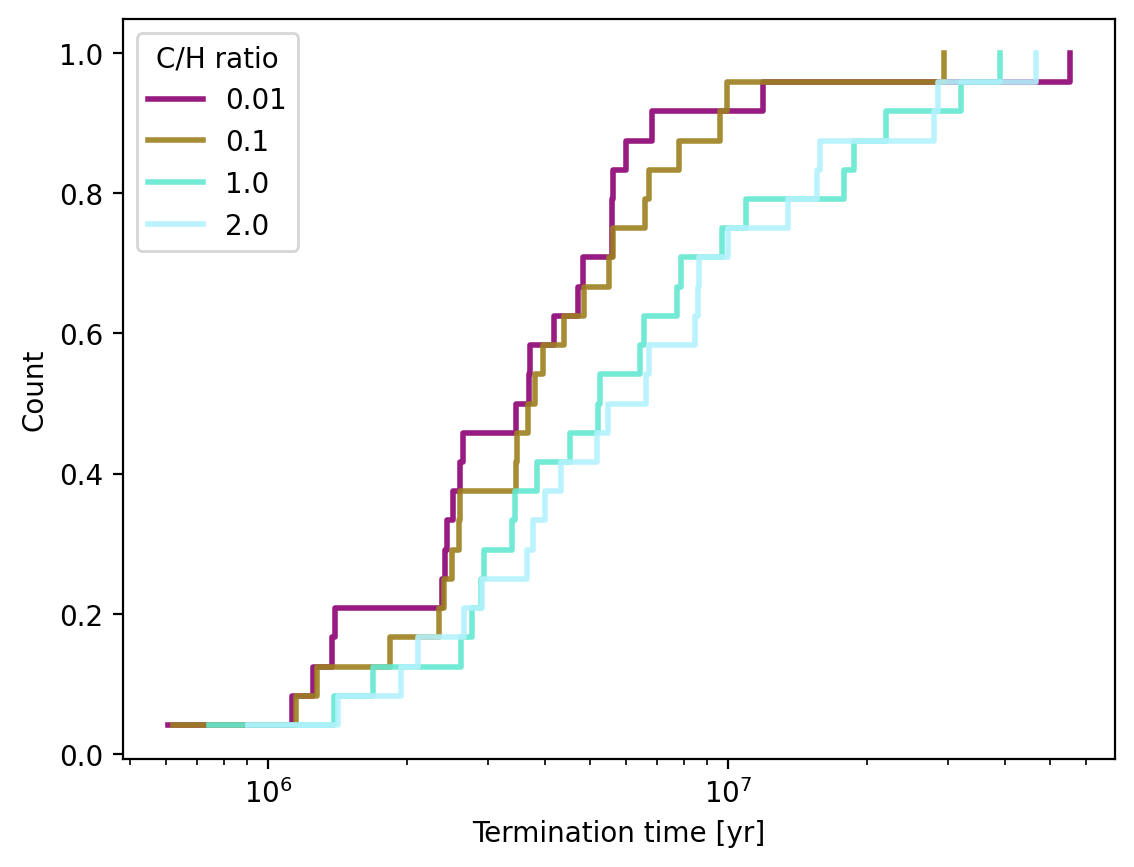

In [77]:
ecdf_indep(
    "Time", "Termination time [yr]",
    "CH_ratio", "C/H ratio",
    logx=True, logy=False, logz=True
)